# **Objective 1:** Implement L2 regularized linear regression without the use of machine learning packages. Find the best lambda for lambda ranging from 0 to 150.

3 sets of train/test datasets of varying sizes with continuous values were provided.

- 1a. For each dataset, which λ value gives the least test set MSE?
- 1b. For each of datasets 100-100, 50(1000)-100, 100(1000)-100, provide an additional graph with λ ranging from 1 to 150.
- 1c. Explain why λ = 0 (i.e., no regularization) gives abnormally large MSEs for those three datasets in (b).

- 2a. Using CV technique, what is the best choice of λ value and the corresponding test set MSE for each of the six datasets?
- 2b. How do the values for λ and MSE obtained from CV compare to the choice of λ and MSE in question 1(a)?
- 2c. What are the drawbacks of CV?
- 2d. What are the factors affecting the performance of CV?

- 3a. Fix λ = 1, 25, 150. For each of these values, plot a learning curve for the algorithm using the dataset 1000-100.csv.


In [1]:
import pandas as pd
import numpy as np
import numpy.linalg
from numpy.linalg import inv
import matplotlib.pyplot as plt

In [2]:
#Creating 3 additional files from train-1000-100.csv
train_1000_100 = pd.read_csv("train-1000-100.csv")
#First 50 instances including header
train_1000_100.head(50).to_csv("train-50(1000)-100.csv")
#First 100 instances including header
train_1000_100.head(100).to_csv("train-100(1000)-100.csv")
#First 150 instances including header
train_1000_100.head(150).to_csv("train-150(1000)-100.csv")

In [36]:
##Function
def Ridge(range_start,lamb,traincsv,testcsv):
    train1 = pd.read_csv(traincsv)
    test1 = pd.read_csv(testcsv)
    
    #Train Set preparation
    X = train1[[col for col in train1 if col.startswith('x')]]
    n_train = len(X)
    X0 = np.ones((n_train,1))
    X = np.hstack((X0,X))
    X = np.array(X) #convert X to matrix
    y = train1['y']
    y = np.array(y) #convert y to a vector
    Xtrans = np.transpose(X)
    identity10 = np.identity(len(X[0]))
    
    #Test Set Preparation
    X_test = test1[[col for col in test1 if col.startswith('x')]]
    n_test = len(X_test)
    X0_test = np.ones((n_test,1))
    X_test = np.hstack((X0_test,X_test))
    X_test = np.array(X_test) #convert X to matrix
    y_test = test1['y']
    y_test = np.array(y_test) #convert y to a vector
    Xtrans_test = np.transpose(X_test)
    identity10_test = np.identity(len(X_test[0]))

    #Train Set Array
    train_mse_array = [[i for i in range(range_start,lamb+1)],[]]
    
    #Train Set Array
    test_mse_array = [[i for i in range(range_start,lamb+1)],[]]    

    #Train Set For Loop
    for i in range(range_start,lamb+1):
        w = np.dot(np.dot(inv(np.dot(Xtrans, X) + (i * identity10)),Xtrans),y)    #coefficients
        mse = sum((np.dot(X,w) - y)**2)/(len(X))    #train set MSE
        train_mse_array[1].append(mse)
        mse_test = sum((np.dot(X_test,w) - y_test)**2)/(len(X_test))     #test set MSE
        test_mse_array[1].append(mse_test)
        
    print "The Least Train Set MSE = ", min(train_mse_array[1])
    if range_start > 0:
        final_train_lambda = np.where(train_mse_array == min(train_mse_array[1]))[1][0] + range_start
        final_test_lambda = np.where(test_mse_array == min(test_mse_array[1]))[1][0] + range_start
    else: 
        final_train_lambda = np.where(train_mse_array == min(train_mse_array[1]))[1][0]
        final_test_lambda = np.where(test_mse_array == min(test_mse_array[1]))[1][0]
    print "Lambda = ", final_train_lambda
    final_coefs = np.dot(np.dot(inv(np.dot(Xtrans, X) + final_train_lambda * identity10),Xtrans),y) # w vector with the optimal lambda
    #print "Train Set Coefficients = ", final_coefs
    print "\n"
    print "The Least Test Set MSE = ", min(test_mse_array[1])
    final_test_lambda = np.where(test_mse_array == min(test_mse_array[1]))[1][0]
    print "Lambda = ", final_test_lambda
    #print test_mse_array
    print X.shape
    print y.shape
    print X_test.shape

    #Plots
    #train set lambda vs MSE
    plt.plot(train_mse_array[0],train_mse_array[1],color='blue')
    plt.plot(test_mse_array[0],test_mse_array[1],color='red')
    plt.xlabel('Lambda')
    plt.ylabel('MSE')
    plt.title('Train & Test Set MSE - Dataset:' + str(traincsv))
    plt.legend(('Train','Test'))
    plt.show()

# ----------------------------- 1A -----------------------------

The Least Train Set MSE =  5.45004352098
Lambda =  0


The Least Test Set MSE =  6.25803107717
Lambda =  9
(100L, 11L)
(100L,)
(1000L, 11L)


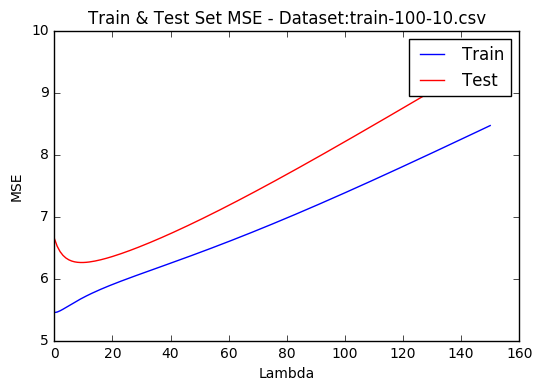

In [37]:
Ridge(0,150,"train-100-10.csv","test-100-10.csv")

The Least Train Set MSE =  0.469300180516
Lambda =  1


The Least Test Set MSE =  6.96543799705
Lambda =  24
(100L, 101L)
(100L,)
(1000L, 101L)


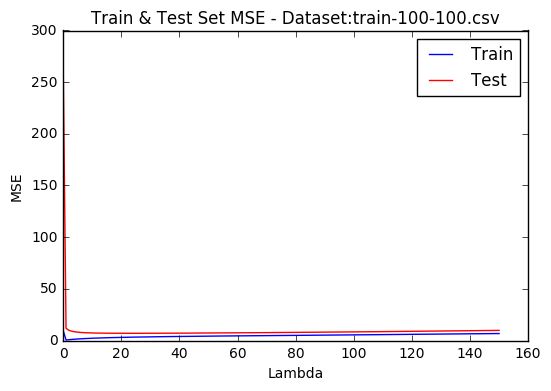

In [38]:
Ridge(0,150,"train-100-100.csv","test-100-100.csv")

The Least Train Set MSE =  5.21003470313
Lambda =  0


The Least Test Set MSE =  6.3891388833
Lambda =  45
(1000L, 101L)
(1000L,)
(1000L, 101L)


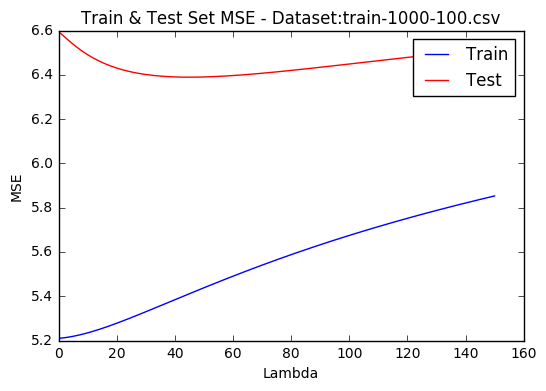

In [39]:
Ridge(0,150,"train-1000-100.csv","test-1000-100.csv")

The Least Train Set MSE =  0.357478735067
Lambda =  1


The Least Test Set MSE =  8.11238414122
Lambda =  12
(50L, 101L)
(50L,)
(1000L, 101L)


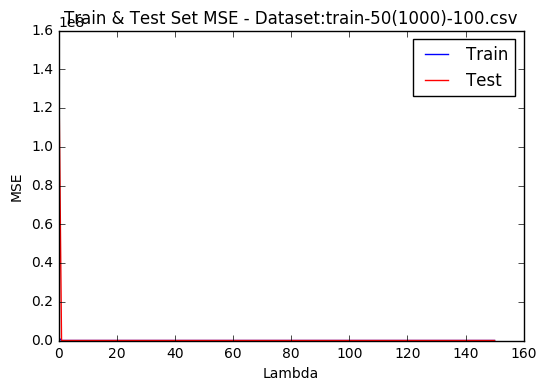

In [40]:
Ridge(0,150,"train-50(1000)-100.csv","test-1000-100.csv")

The Least Train Set MSE =  0.835191000044
Lambda =  1


The Least Test Set MSE =  7.69935465137
Lambda =  25
(100L, 101L)
(100L,)
(1000L, 101L)


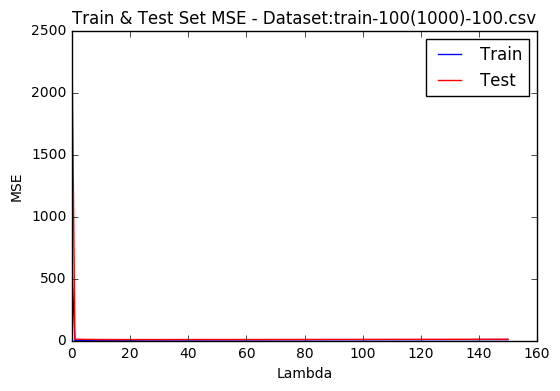

In [41]:
Ridge(0,150,"train-100(1000)-100.csv","test-1000-100.csv")

The Least Train Set MSE =  2.0115592919
Lambda =  0


The Least Test Set MSE =  7.05202399327
Lambda =  31
(150L, 101L)
(150L,)
(1000L, 101L)


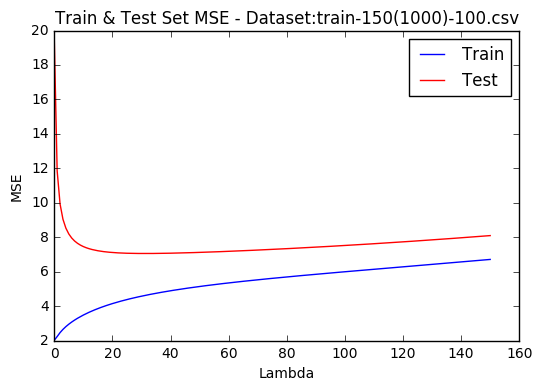

In [42]:
Ridge(0,150,"train-150(1000)-100.csv","test-1000-100.csv")

# ----------------------------- 1B -----------------------------

The Least Train Set MSE =  0.469300180516
Lambda =  1


The Least Test Set MSE =  7.21276952583
Lambda =  82


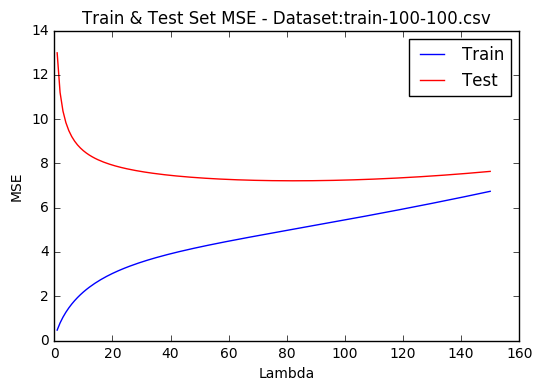

In [10]:
Ridge(1,150,"train-100-100.csv","test-1000-100.csv")

The Least Train Set MSE =  0.357478735067
Lambda =  1


The Least Test Set MSE =  8.11238414122
Lambda =  11
(50L, 101L)
(50L,)


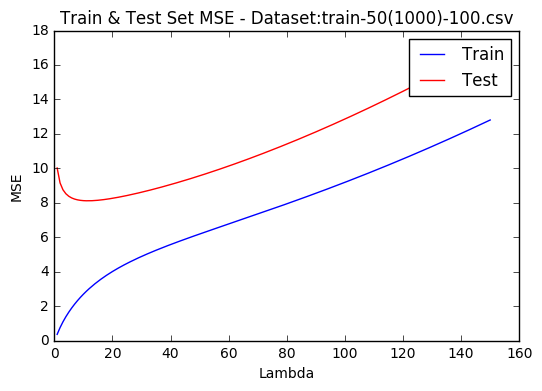

In [35]:
Ridge(1,150,"train-50(1000)-100.csv","test-1000-100.csv")

The Least Train Set MSE =  0.835191000044
Lambda =  1


The Least Test Set MSE =  7.69935465137
Lambda =  24


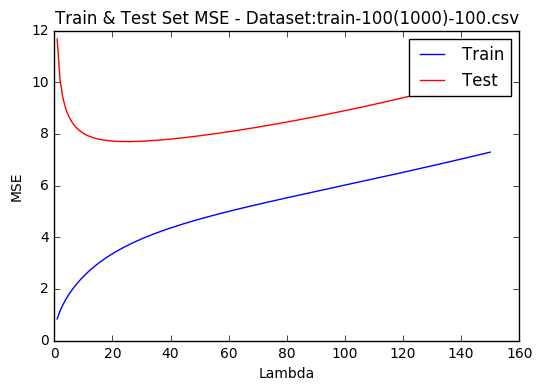

In [12]:
Ridge(1,150,"train-100(1000)-100.csv","test-1000-100.csv")

# ----------------------------- 1C -----------------------------

The Least Train Set MSE =  1419728.70888
Lambda =  0


The Least Test Set MSE =  151621907.758
Lambda =  0
(50L, 101L)
(50L,)


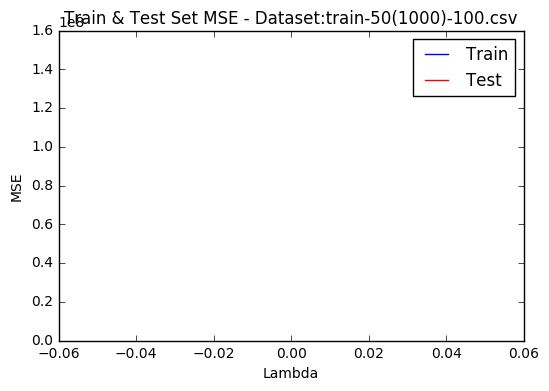

In [32]:
Ridge(0,0,"train-50(1000)-100.csv","test-1000-100.csv")

The Least Train Set MSE =  560.772340488
Lambda =  0


The Least Test Set MSE =  2333.18952386
Lambda =  0
(100L, 101L)
(100L,)


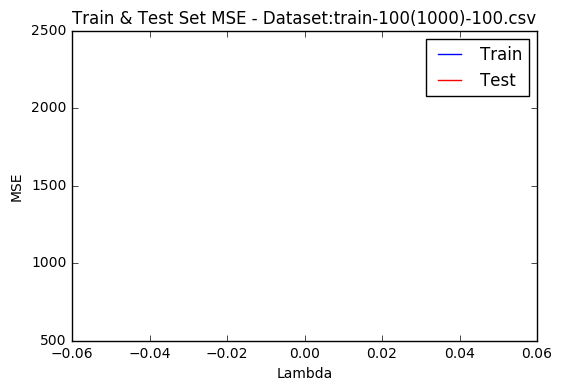

In [33]:
Ridge(0,0,"train-100(1000)-100.csv","test-1000-100.csv")

The Least Train Set MSE =  2.0115592919
Lambda =  0


The Least Test Set MSE =  19.581499155
Lambda =  0
(150L, 101L)
(150L,)


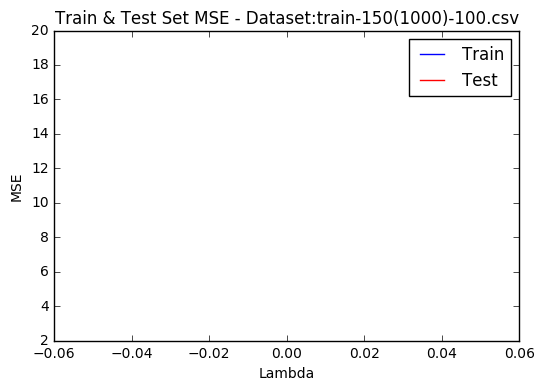

In [34]:
Ridge(0,0,"train-150(1000)-100.csv","test-1000-100.csv")

# ----------------------------- 2A -----------------------------

In [77]:
def RidgeCV(range_start,lamb,traincsv,testcsv): 
    train1 = pd.read_csv(traincsv)
    test1 = pd.read_csv(testcsv)
    
    #Train Set preparation
    X = train1[[col for col in train1 if col.startswith('x')]]
    n_train = len(X) 
    X0 = np.ones((n_train,1)) #Create array of ones
    X = np.hstack((X0,X)) #Add array of ones as first column of X matrix
    X = np.array(X) #convert X to a numpy matrix
    y = train1['y']
    y = np.array(y) #convert y to a vector
    Xtrans = np.transpose(X) #X transpose
    identity10 = np.identity(len(X[0])) #identity matrix
    
    #Final Test Set Preparation
    X_final_test = test1[[col for col in test1 if col.startswith('x')]]
    n_final_test = len(X_final_test)
    X0_test = np.ones((n_final_test,1))
    X_final_test = np.hstack((X0_test,X_final_test))
    X_final_test = np.array(X_final_test) #convert X to matrix
    y_final_test = test1['y']
    y_final_test = np.array(y_final_test) #convert y to a vector
    Xtrans_test = np.transpose(X_final_test)
    identity10_test = np.identity(len(X_final_test[0]))

    
    #split X data into f folds
    folds = 10
    fold_size = len(X)/folds
    x_folds = numpy.zeros((folds,fold_size,len(X[0])))
    for f in range(folds):
        x_folds[f] = X[fold_size*f:fold_size*(f+1)]
    
    #split y data in f folds
    y_folds = numpy.zeros((folds,fold_size,))
    for f in range(folds):
        y_folds[f] = y[fold_size*f:fold_size*(f+1)]

    #Train Set Array
    test_mse_array = []
    
    lamb_mse_array = [[i for i in range(range_start,lamb+1)],[]]
    for i in range(range_start,lamb+1):
        test_mse_array = []
        for k in range(0,len(x_folds)):
            b = np.s_[fold_size*k:fold_size*(k+1)]
            X_sub = np.delete(X, b, 0)
            y_sub = np.delete(y, b, 0)
            X_test = x_folds[k]
            y_test = y_folds[k]
            X_subtrans = np.transpose(X_sub)
            identitysub = np.identity(len(X_sub[0]))
            
            w = np.dot(np.dot(inv(np.dot(X_subtrans, X_sub) + i * identitysub),X_subtrans),y_sub)    #coefficients
            mse_test = sum((np.dot(X_test,w) - y_test)**2)/(len(X_test))    #test set MSE
            #print k   #check
            test_mse_array.append(mse_test)
            #test_mse_array = vstack(())
            #print test_mse_array    #check
        lamb_mse_array[1].append(np.mean(test_mse_array))
        #print lamb_mse_array[1]
    print "The Least Train Set MSE = ", min(lamb_mse_array[1])
    final_train_lambda = np.where(lamb_mse_array == min(lamb_mse_array[1]))[1][0]
    print "Lambda = ", final_train_lambda
    
    #print lamb_mse_array[1]
    #print lamb_mse_array
    

    
    #Real Test MSE
    #w_final = np.dot(np.dot(inv(np.dot(X_subtrans, X_sub) + final_train_lambda * identitysub),X_subtrans),y_sub)
    w_final = np.dot(np.dot(inv(np.dot(Xtrans, X) + final_train_lambda * identity10),Xtrans),y)
    mse_final_test = sum((np.dot(X_final_test,w_final) - y_final_test)**2)/(len(X_final_test))
    print "Test set MSE = ", mse_final_test

In [78]:
RidgeCV(0,150,"train-100-10.csv","test-100-10.csv")

The Least Train Set MSE =  6.26613480309
Lambda =  11
Test set MSE =  6.26100224778


In [67]:
RidgeCV(0,150,"train-100-100.csv","test-100-100.csv") 

The Least Train Set MSE =  5.14970684319
Lambda =  11
Test set MSE =  7.22068046534


In [68]:
RidgeCV(0,150,"train-1000-100.csv","test-1000-100.csv") 

The Least Train Set MSE =  6.26458935761
Lambda =  59
Test set MSE =  6.3956763518


In [79]:
RidgeCV(0,150,"train-50(1000)-100.csv","test-1000-100.csv") 

The Least Train Set MSE =  7.45551083882
Lambda =  13
Test set MSE =  8.11761979178


In [80]:
RidgeCV(0,150,"train-100(1000)-100.csv","test-1000-100.csv") 

The Least Train Set MSE =  5.8878657782
Lambda =  15
Test set MSE =  7.80242422147


In [81]:
RidgeCV(0,150,"train-150(1000)-100.csv","test-1000-100.csv") 

The Least Train Set MSE =  6.82897771905
Lambda =  38
Test set MSE =  7.06272435404


# ----------------------------- 3A -----------------------------

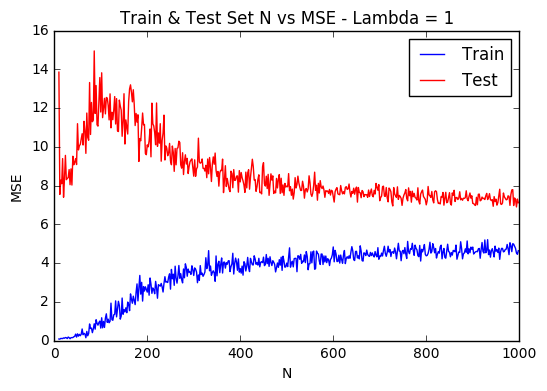

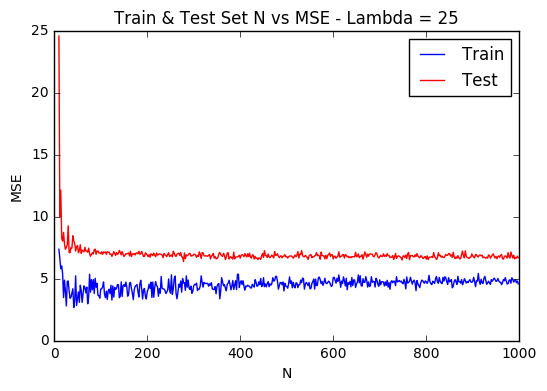

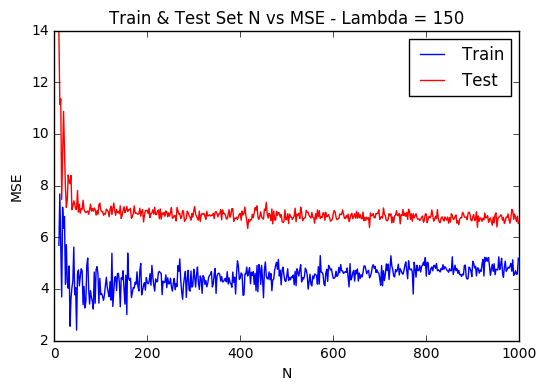

In [64]:
train1 = pd.read_csv("train-1000-100.csv")
test1 = pd.read_csv("test-1000-100.csv")

#Train Set preparation
X = train1[[col for col in train1 if col.startswith('x')]]
n_train = len(X)
X0 = np.ones((n_train,1))
X = np.hstack((X0,X))
X = np.array(X) #convert X to matrix
y = train1['y']
y = np.array(y) #convert y to a vector
Xtrans = np.transpose(X)
identity10 = np.identity(len(X[0]))

#Test Set Preparation
X_test = test1[[col for col in test1 if col.startswith('x')]]
n_test = len(X_test)
X0_test = np.ones((n_test,1))
X_test = np.hstack((X0_test,X_test))
X_test = np.array(X_test) #convert X to matrix
y_test = test1['y']
y_test = np.array(y_test) #convert y to a vector
Xtrans_test = np.transpose(X_test)
identity10_test = np.identity(len(X_test[0]))



#lambda of 1
train_mse_array1 = [[],[]]
test_mse_array1 = [[],[]]

for i in range(10,1000,2):
    sub_num = np.random.randint(0,len(X),size=i)
    x_subset = X[sub_num,:]
    y_subset = y[sub_num,]
    x_subsettrans = np.transpose(x_subset)
    identity_sub = np.identity(len(x_subset[0]))
    w_1 = np.dot(np.dot(inv(np.dot(x_subsettrans, x_subset) + 1 * identity_sub),x_subsettrans),y_subset)    #coefficients
    train_mse = sum((np.dot(x_subset,w_1) - y_subset)**2)/(len(x_subset))    #train set MSE
    train_mse_array1[0].append(i)
    train_mse_array1[1].append(train_mse)
    mse_test = sum((np.dot(X_test,w_1) - y_test)**2)/(len(X_test))     #test set MSE
    test_mse_array1[0].append(i)
    test_mse_array1[1].append(mse_test)


#lambda of 25
train_mse_array25 = [[],[]]
test_mse_array25 = [[],[]]

for i in range(10,1000,2):
    #print i
    sub_num = np.random.randint(0,len(X),size=i)
    x_subset = X[sub_num,:]
    y_subset = y[sub_num,]
    x_subsettrans = np.transpose(x_subset)
    #print x_subset.shape
    identity_sub = np.identity(len(x_subset[0]))
    w_1 = np.dot(np.dot(inv(np.dot(x_subsettrans, x_subset) + 25 * identity_sub),x_subsettrans),y_subset)    #coefficients
    train_mse = sum((np.dot(x_subset,w_1) - y_subset)**2)/(len(x_subset))    #train set MSE
    #print train_mse
    train_mse_array25[0].append(i)
    train_mse_array25[1].append(train_mse)
    mse_test = sum((np.dot(X_test,w_1) - y_test)**2)/(len(X_test))     #test set MSE
    test_mse_array25[0].append(i)
    test_mse_array25[1].append(mse_test)
    
#lambda of 150
train_mse_array150 = [[],[]]
test_mse_array150 = [[],[]]

for i in range(10,1000,2):
    sub_num = np.random.randint(0,len(X),size=i)
    x_subset = X[sub_num,:]
    y_subset = y[sub_num,]
    x_subsettrans = np.transpose(x_subset)
    identity_sub = np.identity(len(x_subset[0]))
    w_1 = np.dot(np.dot(inv(np.dot(x_subsettrans, x_subset) + 25 * identity_sub),x_subsettrans),y_subset)    #coefficients
    train_mse = sum((np.dot(x_subset,w_1) - y_subset)**2)/(len(x_subset))    #train set MSE
    train_mse_array150[0].append(i)
    train_mse_array150[1].append(train_mse)
    mse_test = sum((np.dot(X_test,w_1) - y_test)**2)/(len(X_test))     #test set MSE
    test_mse_array150[0].append(i)
    test_mse_array150[1].append(mse_test)

    
##fig = plt.figure(figsize=(20, 10))
#plt.subplot(1,3,1)
plt.plot(train_mse_array1[0],train_mse_array1[1],color='blue')
plt.plot(test_mse_array1[0],test_mse_array1[1],color='red')
plt.xlabel('N')
plt.ylabel('MSE')
plt.title('Train & Test Set N vs MSE - Lambda = 1')
plt.legend(('Train','Test'))
plt.show()
#plt.subplot(1,3,2)
plt.plot(train_mse_array25[0],train_mse_array25[1],color='blue')
plt.plot(test_mse_array25[0],test_mse_array25[1],color='red')
plt.xlabel('N')
plt.ylabel('MSE')
plt.title('Train & Test Set N vs MSE - Lambda = 25')
plt.legend(('Train','Test'))
plt.show()
#plt.subplot(1,3,3)
plt.plot(train_mse_array150[0],train_mse_array150[1],color='blue')
plt.plot(test_mse_array150[0],test_mse_array150[1],color='red')
plt.xlabel('N')
plt.ylabel('MSE')
plt.title('Train & Test Set N vs MSE - Lambda = 150')
plt.legend(('Train','Test'))
plt.show()
